
## Problem Statement:


####  Build a machine learning model using a Multi-Layer Perceptron (MLP) to classify handwritten digits (0-9) from the MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images, where each image is a 28x28 pixel grayscale representation of a digit.

In [ ]:
#Install necessory libraries
!pip install matplotlib
!pip install keras
!pip install tensorflow

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and model building
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import mnist  # For importing the MNIST dataset
from keras import utils  # For various utility functions


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the necessary module from Keras
from keras.datasets import mnist

# Load the MNIST dataset, which is a dataset of handwritten digits
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)


(10000,)


In [ ]:
# Display the shape of the x_train array
# x_train is the array containing the training data (images of handwritten digits)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)


(60000, 28, 28)


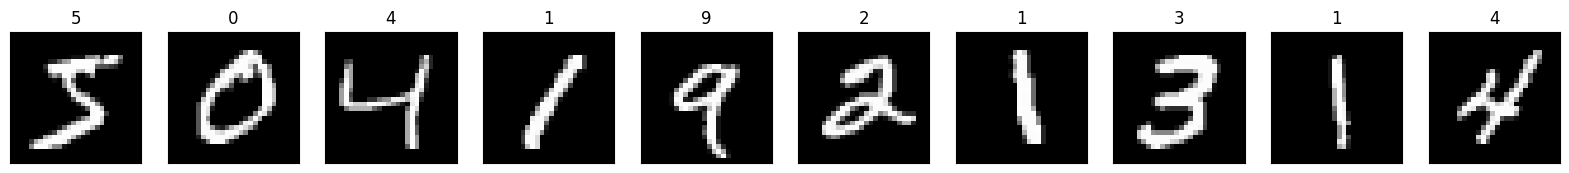

In [ ]:
# Let's plot the first 10 images from the training dataset
# Create a figure and an array of subplots
# ncols=10: Specifies the number of columns in the subplot grid (10 columns)
# sharex=False: Determines whether the x-axis is shared among subplots (not shared)
# sharey=True: Determines whether the y-axis is shared among subplots (shared)
# figsize=(20, 4): Specifies the width and height of the figure in inches (20 inches wide, 4 inches tall)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()


In [ ]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# Let's check how the labels look after converting to categorical format
print(y_train)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# Let's check the y_test labels to see how they look after conversion to categorical format
print(y_test)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Let's check the shape of the y_test array
# This provides information about the dimensions of the y_test array
print(y_test.shape)


(10000, 10)


In [ ]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 10 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='sigmoid'))

# Add another Dense layer with 5 neurons and 'sigmoid' activation function
model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))


In [ ]:
28*28

784

In [ ]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

## Flatten Layer (No Parameters):


The Flatten layer reshapes the input data into a one-dimensional array. It does not involve any learnable parameters (weights or biases). Its purpose is purely to prepare the data for the subsequent dense layers.

![image.png](attachment:33ae0bce-302a-4e11-ae71-38f67c22b2d3.png)
![image.png](attachment:898447d6-7bd2-4c48-8739-9efb166519ea.png)


## Total Parameters:

The total number of parameters in the model is the sum of parameters in all layers:

\[ 7850 + 55 + 60 = 7965 \]


Q- Why Flatten ?

Ans -> If you have a two-dimensional photo, when flattened, it converts into one-dimensional. We are flattening because we are using a multilayer perceptron. A multilayer perceptron only takes a single input; it does not consider anything with more than one dimension. That's why we have to flatten.

Dense -> Fully Connected Layers

Activation Function -> Which activation function do you want to use?

Param -> Basically, the number of weights + biases we will be training.

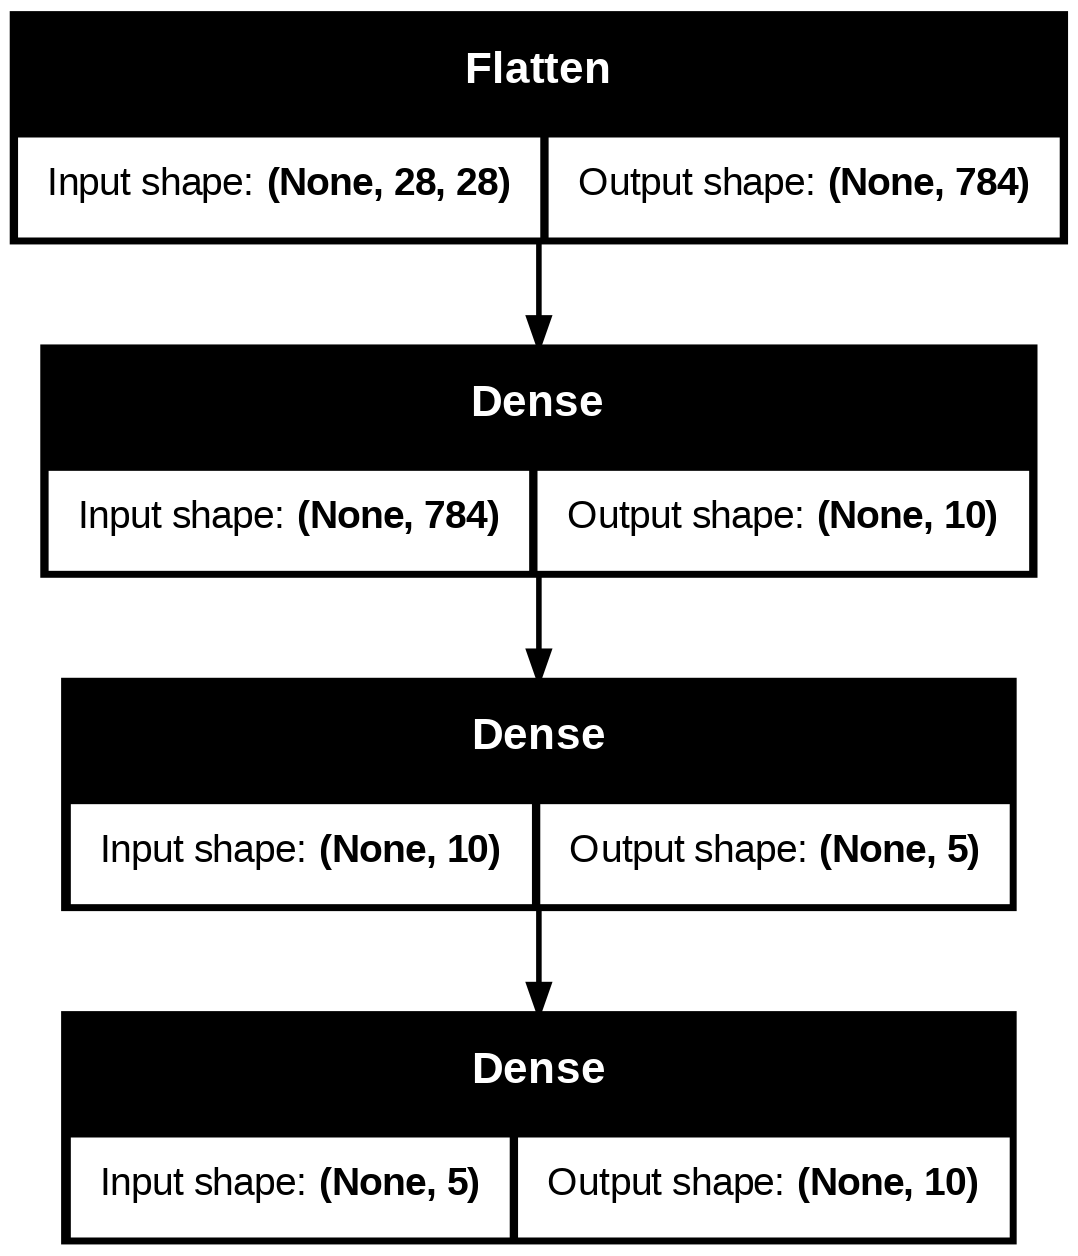

In [ ]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)


In [ ]:
!pip install pydot

In [ ]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - acc: 0.3160 - loss: 2.0306 - val_acc: 0.6574 - val_loss: 1.3107
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.6663 - loss: 1.2108 - val_acc: 0.7133 - val_loss: 0.9590
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.7253 - loss: 0.9253 - val_acc: 0.7452 - val_loss: 0.8352
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7541 - loss: 0.8005 - val_acc: 0.7853 - val_loss: 0.7246
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.7801 - loss: 0.7282 - val_acc: 0.8079 - val_loss: 0.6982
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.7941 - loss: 0.7029 - val_acc: 0.8036 - val_loss: 0.6561
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.7935 - loss: 0.6782 - val_acc: 0.8250 - val_loss: 0.6196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8114 - loss: 0.6493 - val_acc: 0.8186 - val_loss: 0.6000
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━

Batch Size is the input when entering. I never mentioned what kind of input will be used, so there are various ways to send the inputs. You can also send them in batches. However, you cannot send 60000 data points in one batch because your RAM cannot handle it. By default, Batch Size is set to 32.


1 Step Per Epoch' refers to how the inputs are processed. With a batch size of 32 and a total of 60000 points, it means that 32 data points are processed at a time. Once all 60000 data points have been processed once, we complete one epoch.



To calculate the number of steps per epoch, divide the total number of data points (60000) by the batch size (32), resulting in 1875 steps per epoch.

In [ ]:
# Saving the trained model to a file named 'mnist_models_scifer.h5'
model.save('mnist_models_scifors.h5')

In [ ]:
# Printing the training history containing the loss and accuracy metrics
print(history.history)

{'acc': [0.46593332290649414, 0.6795333623886108, 0.7262166738510132, 0.7671166658401489, 0.7839499711990356, 0.7948333621025085, 0.7888166904449463, 0.8127166628837585, 0.8019000291824341, 0.821233332157135], 'loss': [1.7766964435577393, 1.1242599487304688, 0.8996793627738953, 0.7767679691314697, 0.726722776889801, 0.6865525245666504, 0.6901041269302368, 0.6447358131408691, 0.6415064334869385, 0.6180508732795715], 'val_acc': [0.6574000120162964, 0.7132999897003174, 0.745199978351593, 0.7853000164031982, 0.8079000115394592, 0.803600013256073, 0.824999988079071, 0.8185999989509583, 0.7943000197410583, 0.8421000242233276], 'val_loss': [1.3107362985610962, 0.9590104222297668, 0.8351612091064453, 0.7245655059814453, 0.6981987357139587, 0.6561235189437866, 0.6195863485336304, 0.5999698042869568, 0.6508130431175232, 0.5791496634483337]}


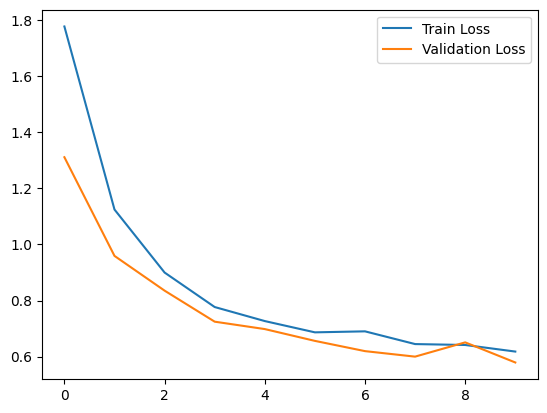

In [ ]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()


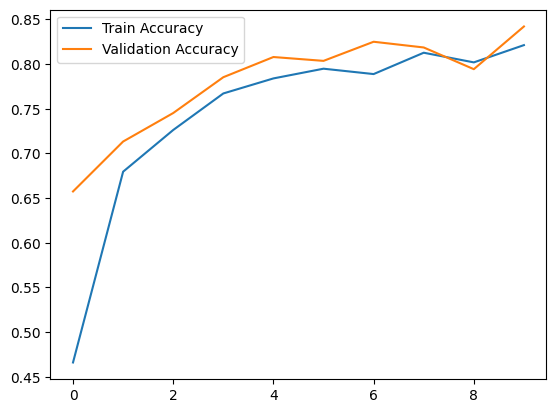

In [ ]:
# Plotting the training accuracy curve
plt.plot(history.history['acc'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()


In [ ]:
# Importing TensorFlow library
import tensorflow as tf


In [ ]:
# Loading the pre-trained model from the file 'mnist_models_scifer.h5'
model = tf.keras.models.load_model('mnist_models_scifors.h5')

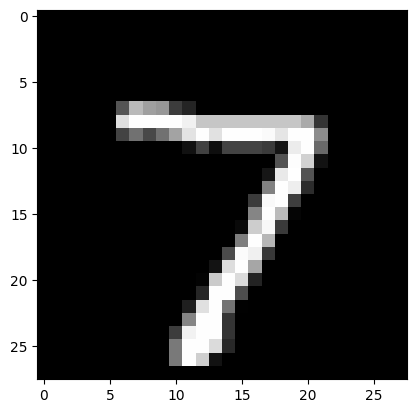

In [ ]:
# Displaying the first test image from the dataset
plt.imshow(x_test[0], cmap='gray')


In [ ]:
# Importing the NumPy library
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[0], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = model.predict(x)

# Printing the predicted class label
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[5.6881285e-03 3.7319385e-06 1.0488024e-02 7.6697120e-03 8.1762247e-04
  4.6368809e-03 1.4281370e-04 9.3527961e-01 3.4077757e-04 3.4932699e-02]]


In [ ]:
a=[6,9,7,45,6,9,7,4,52,1,3,6,55,]


In [ ]:
np.argmax(a)

12

In [ ]:
np.argmax(predicted_label)

7

In [ ]:
#AI Engineer - Saurav
#Date- 28 May 2024
#Time - 11:01 AM